# lag and correlation check 

/tmp/ipykernel_1346513/2665151164.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(


Best lag  = 12 hours
Pearson r = 0.293


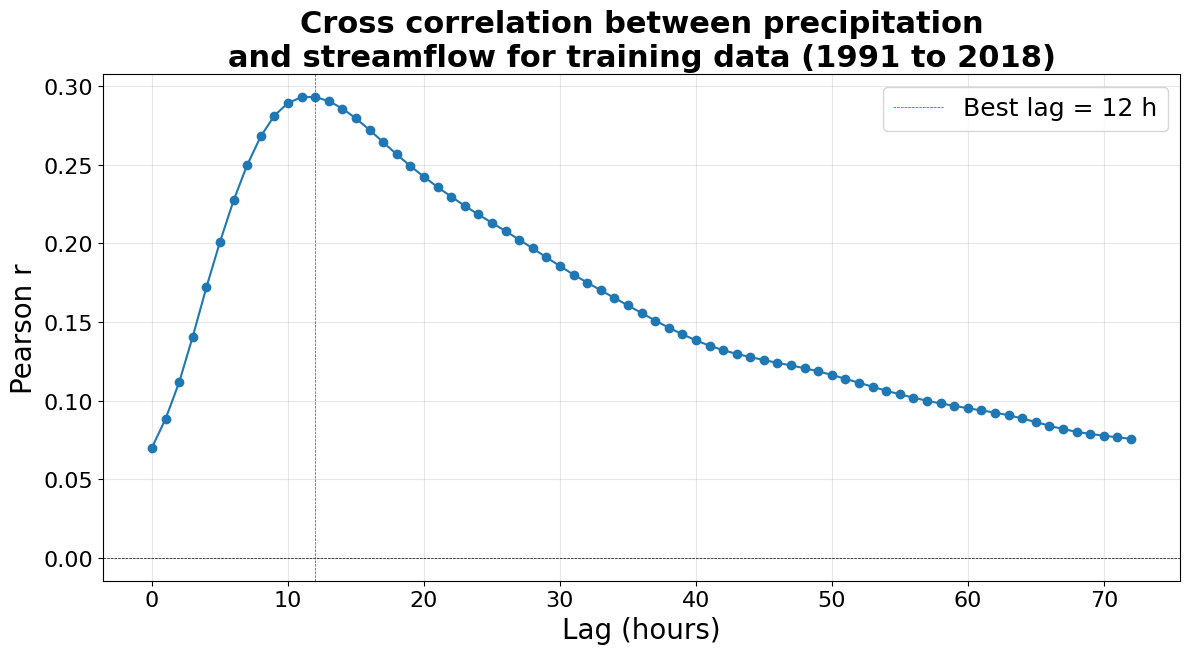

In [17]:
df = (
    pd.read_csv(
        "datasets/SMFV2_Data_withbasin.csv",
        parse_dates=["Time"],                     
        na_values=[-999.0]                       
    )
    .set_index("Time")[["MAP (IN)", "QR (CFS)"]]
)

df = df.dropna(how="any")
df = df[:236588]


max_lag = 72                                        
corrs = {}

for lag in range(max_lag + 1):                      
    r = df["MAP (IN)"].shift(lag).corr(df["QR (CFS)"])  
    corrs[lag] = r

corrs = pd.Series(corrs).dropna()                   
best_lag = corrs.idxmax()                           
best_r   = corrs.loc[best_lag]

print(f"Best lag  = {best_lag} hours")
print(f"Pearson r = {best_r:.3f}")

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
corrs.plot(marker="o")
plt.grid(True, alpha=0.3)
plt.xlabel("Lag (hours)", fontsize=20)
plt.ylabel("Pearson r", fontsize=20)
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(best_lag, color="red", lw=0.5, ls="--", label=f"Best lag = {best_lag} h")
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.title("Cross correlation between precipitation\nand streamflow for training data (1991 to 2018)", fontsize=22, fontweight='bold')
plt.savefig("cross_correlation_plot.png")
plt.show()

/tmp/ipykernel_1346513/268803405.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(


Best lag  = 7 hours
Pearson r = 0.319


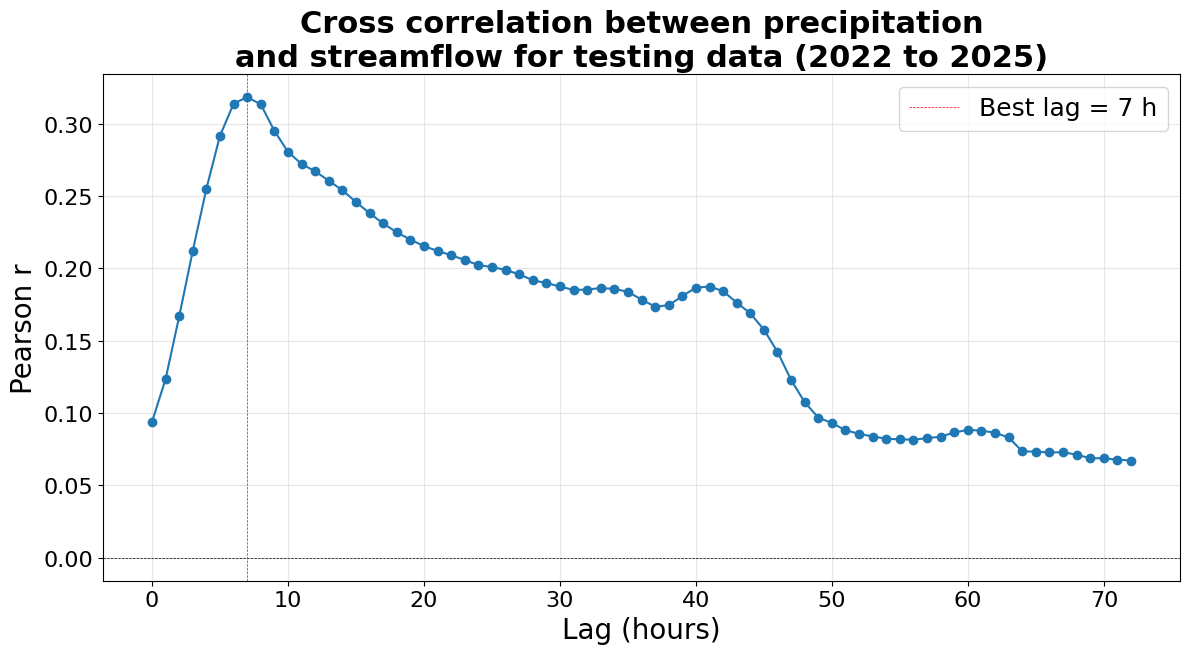

In [19]:
import pandas as pd
import numpy as np

df = (
    pd.read_csv(
        "datasets/SMFV2_Data_withbasin.csv",
        parse_dates=["Time"],                     
        na_values=[-999.0]                       
    )
    .set_index("Time")[["MAP (IN)", "QR (CFS)"]]
)

df = df.dropna(how="any")
df = df[236588+23658:]

max_lag = 72                                        
corrs = {}

for lag in range(max_lag + 1):                      
    r = df["MAP (IN)"].shift(lag).corr(df["QR (CFS)"])  
    corrs[lag] = r

corrs = pd.Series(corrs).dropna()                   
best_lag = corrs.idxmax()                          
best_r   = corrs.loc[best_lag]

print(f"Best lag  = {best_lag} hours")
print(f"Pearson r = {best_r:.3f}")

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
corrs.plot(marker="o")
plt.grid(True, alpha=0.3)
plt.xlabel("Lag (hours)", fontsize=20)
plt.ylabel("Pearson r", fontsize=20)
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(best_lag, color="red", lw=0.5, ls="--", label=f"Best lag = {best_lag} h")
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.title("Cross correlation between precipitation\nand streamflow for testing data (2022 to 2025)", fontsize=22, fontweight='bold')
plt.savefig("cross_correlation_plot.png")
plt.show()



# For top 10%

/var/folders/gc/ch4_vm511_q5pc2zg_9x32800000gn/T/ipykernel_47676/1291778428.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(


Best lag (top-10 % rain) = 8 h
Pearson r = 0.226


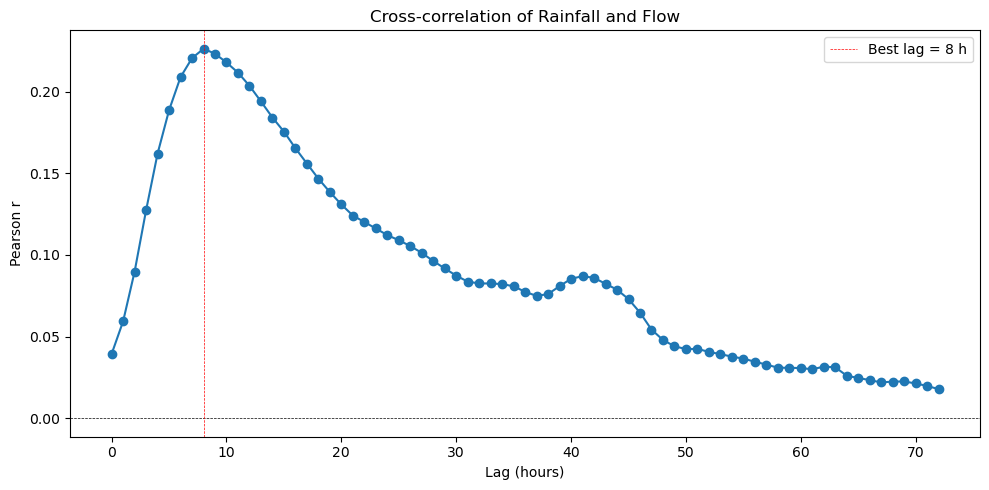

In [6]:
import pandas as pd
import numpy as np

df = (
    pd.read_csv(
        "datasets/SMFV2_Data_withbasin.csv",
        parse_dates=["Time"],                     
        na_values=[-999.0]                       
    )
    .set_index("Time")[["MAP (IN)", "QR (CFS)"]]
)


df = df.dropna(how="any")

# --- decide what “top 10 %” means ------------------------------------------
rain_q90 = df["MAP (IN)"].quantile(0.95)     # 90-th percentile → upper 10 %

max_lag = 72
corrs = {}

for lag in range(max_lag + 1):
    rain_shift = df["MAP (IN)"].shift(lag)

    # mask keeps rows whose *lag-aligned* rainfall is in the upper decile
    mask = rain_shift > rain_q90

    # pandas .corr ignores NaNs; we keep only the masked rows
    r = rain_shift[mask].corr(df["QR (CFS)"][mask])
    corrs[lag] = r

corrs = pd.Series(corrs).dropna()
best_lag = corrs.idxmax()
best_r   = corrs.loc[best_lag]

print(f"Best lag (top-10 % rain) = {best_lag} h")
print(f"Pearson r = {best_r:.3f}")



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
corrs.plot(marker="o", title="Cross-correlation of Rainfall and Flow")
plt.xlabel("Lag (hours)")
plt.ylabel("Pearson r")
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(best_lag, color="red", lw=0.5, ls="--", label=f"Best lag = {best_lag} h")
plt.legend()
plt.tight_layout()
plt.savefig("cross_correlation_plot.png")
plt.show()



/var/folders/gc/ch4_vm511_q5pc2zg_9x32800000gn/T/ipykernel_47676/2089312393.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(


Best lag (top-10 % rain) = 10 h
Pearson r = 0.210


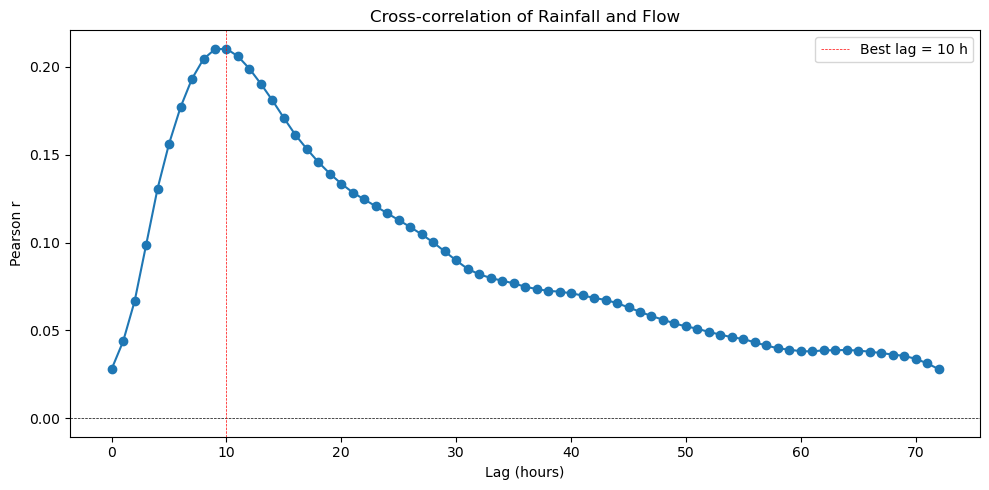

In [7]:
import pandas as pd
import numpy as np

df = (
    pd.read_csv(
        "datasets/SMFV2_Data_withbasin.csv",
        parse_dates=["Time"],                     
        na_values=[-999.0]                       
    )
    .set_index("Time")[["MAP (IN)", "QR (CFS)"]]
)


df = df.dropna(how="any")
df = df[:236588]
# --- decide what “top 10 %” means ------------------------------------------
rain_q90 = df["MAP (IN)"].quantile(0.95)     # 90-th percentile → upper 10 %

max_lag = 72
corrs = {}

for lag in range(max_lag + 1):
    rain_shift = df["MAP (IN)"].shift(lag)

    # mask keeps rows whose *lag-aligned* rainfall is in the upper decile
    mask = rain_shift > rain_q90

    # pandas .corr ignores NaNs; we keep only the masked rows
    r = rain_shift[mask].corr(df["QR (CFS)"][mask])
    corrs[lag] = r

corrs = pd.Series(corrs).dropna()
best_lag = corrs.idxmax()
best_r   = corrs.loc[best_lag]

print(f"Best lag (top-10 % rain) = {best_lag} h")
print(f"Pearson r = {best_r:.3f}")



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
corrs.plot(marker="o", title="Cross-correlation of Rainfall and Flow")
plt.xlabel("Lag (hours)")
plt.ylabel("Pearson r")
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(best_lag, color="red", lw=0.5, ls="--", label=f"Best lag = {best_lag} h")
plt.legend()
plt.tight_layout()
plt.savefig("cross_correlation_plot.png")
plt.show()


/var/folders/gc/ch4_vm511_q5pc2zg_9x32800000gn/T/ipykernel_47676/610380122.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(


Best lag (top-10 % rain) = 6 h
Pearson r = 0.332


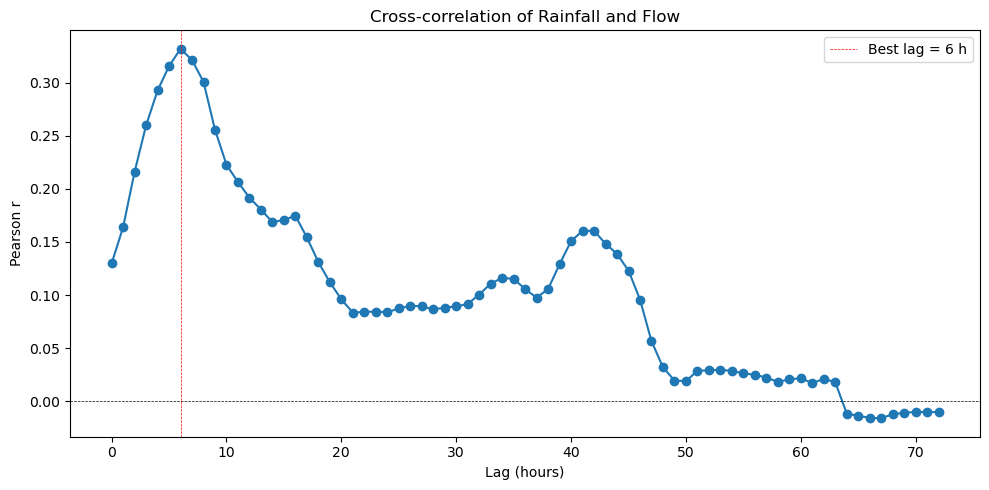

In [8]:
import pandas as pd
import numpy as np

df = (
    pd.read_csv(
        "datasets/SMFV2_Data_withbasin.csv",
        parse_dates=["Time"],                     
        na_values=[-999.0]                       
    )
    .set_index("Time")[["MAP (IN)", "QR (CFS)"]]
)


df = df.dropna(how="any")
df = df[236588+23658:]

# --- decide what “top 10 %” means ------------------------------------------
rain_q90 = df["MAP (IN)"].quantile(0.95)     # 90-th percentile → upper 10 %

max_lag = 72
corrs = {}

for lag in range(max_lag + 1):
    rain_shift = df["MAP (IN)"].shift(lag)

    # mask keeps rows whose *lag-aligned* rainfall is in the upper decile
    mask = rain_shift > rain_q90

    # pandas .corr ignores NaNs; we keep only the masked rows
    r = rain_shift[mask].corr(df["QR (CFS)"][mask])
    corrs[lag] = r

corrs = pd.Series(corrs).dropna()
best_lag = corrs.idxmax()
best_r   = corrs.loc[best_lag]

print(f"Best lag (top-10 % rain) = {best_lag} h")
print(f"Pearson r = {best_r:.3f}")



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
corrs.plot(marker="o", title="Cross-correlation of Rainfall and Flow")
plt.xlabel("Lag (hours)")
plt.ylabel("Pearson r")
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(best_lag, color="red", lw=0.5, ls="--", label=f"Best lag = {best_lag} h")
plt.legend()
plt.tight_layout()
plt.savefig("cross_correlation_plot.png")
plt.show()
